In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: >

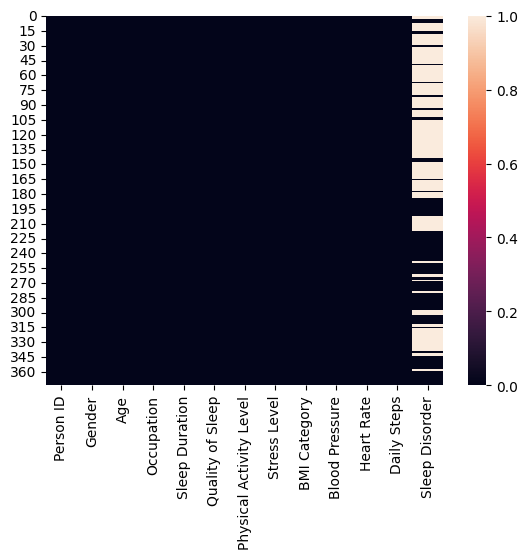

In [3]:
#Empty rows
sns.heatmap(data.isnull())

In [4]:
data = data.drop('Sleep Disorder', axis=1)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


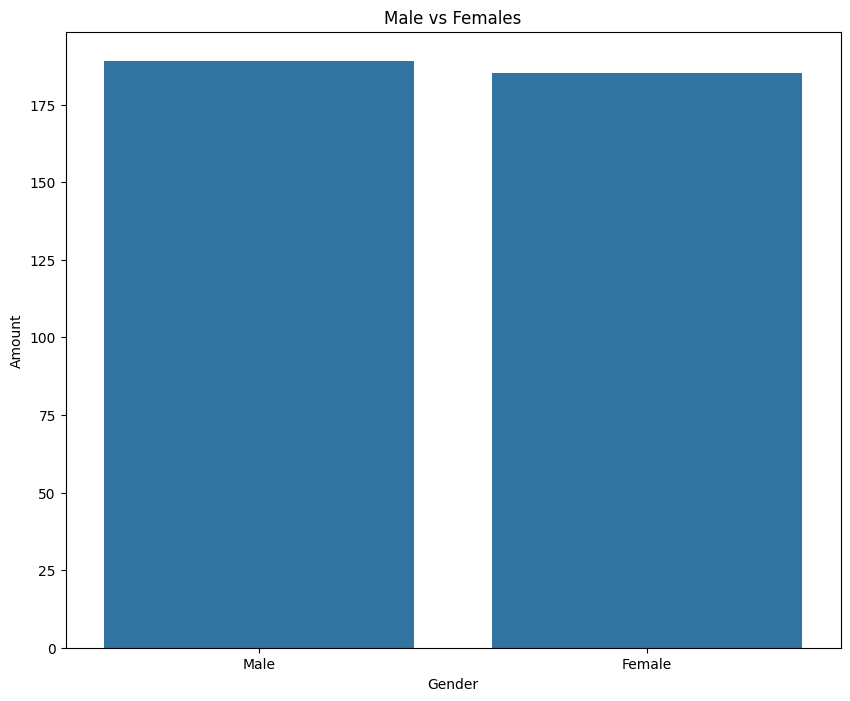

In [6]:
#How many males and females

plt.figure(figsize=(10,8))

sns.countplot(data, x='Gender')
plt.ylabel('Amount')
plt.title('Male vs Females')
plt.show()

In [7]:
#Occupation info
data.Occupation.value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

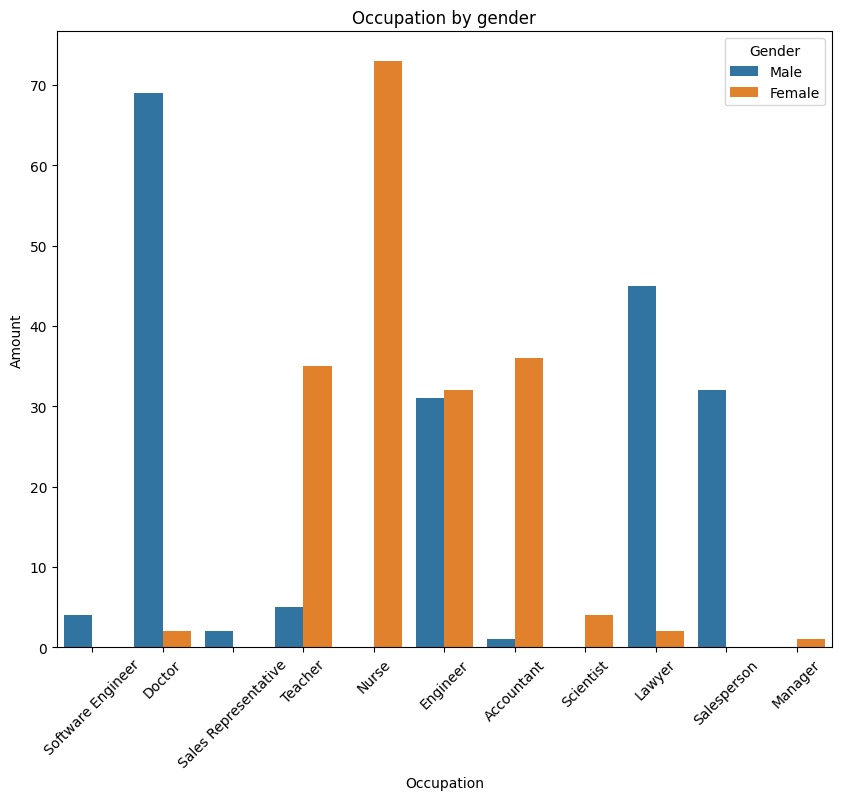

In [ ]:
#Occupation by Gender
plt.figure(figsize=(10,8))

sns.countplot(data, x='Occupation', hue='Gender')
plt.ylabel('Amount')
plt.xticks(rotation = 45)
plt.title('Occupation by gender')
plt.show()

In [13]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [29]:
quality_of_sleep = data.groupby(['Occupation']).agg(
    Quality_of_sleep = ('Quality of Sleep', 'mean'),
    Max_Quality = ('Quality of Sleep', 'max'),
    Min = ('Quality of Sleep', 'min'),
    Mean_Sleep_Duration = ('Sleep Duration', 'mean'),
    Mean_Stress_Level = ('Stress Level', 'mean'),
    Mean_Heart_Rate = ('Heart Rate', 'mean'),
    Mean_Sport_Activity_Per_Minutes = ('Physical Activity Level', 'mean')
)
quality_of_sleep

,Quality_of_sleep,Max_Quality,Min,Mean_Sleep_Duration,Mean_Stress_Level,Mean_Heart_Rate,Mean_Sport_Activity_Per_Minutes
Occupation,,,,,,,
Accountant,7.891892,9,7,7.113514,4.594595,68.864865,58.108108
Doctor,6.647887,9,6,6.970423,6.732394,71.521127,55.352113
Engineer,8.412698,9,5,7.987302,3.888889,67.190476,51.857143
Lawyer,7.893617,8,7,7.410638,5.063830,69.638298,70.425532
Manager,7.000000,7,7,6.900000,5.000000,75.000000,55.000000
Nurse,7.369863,9,5,7.063014,5.547945,72.000000,78.589041
Sales Representative,4.000000,4,4,5.900000,8.000000,85.000000,30.000000
Salesperson,6.000000,6,6,6.403125,7.000000,72.000000,45.000000
Scientist,5.000000,6,4,6.000000,7.000000,78.500000,41.000000


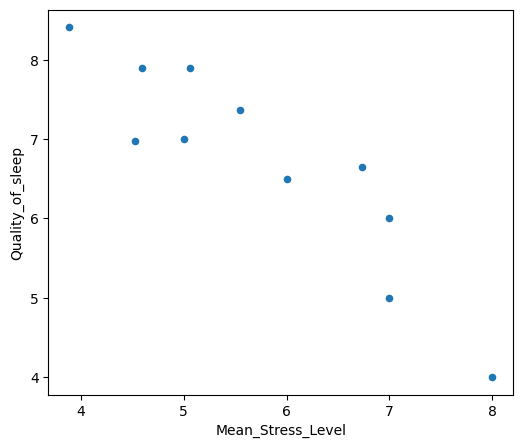

In [32]:
ax = quality_of_sleep.plot.scatter(x="Mean_Stress_Level", y="Quality_of_sleep", figsize=(6, 5))
